## Prediction of Marketing Campaign
Name: Gargi Thakur

Roll Number: 21111

Department: EECS

Course: ECS 308

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings("ignore")

# Reading the Training Dataset

In [4]:
import pandas as pd

#Reading and displaying the training data
df=pd.read_csv("/content/drive/MyDrive/marketing_trn_data.csv")
df.columns
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntGoldProds,MntWines,...,NumWebPurchases,AcceptedCmp3,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain
0,1989,Graduation,Married,"$28,691.00",1,0,7/4/13,56,4,5,...,1,0,0,3,8,0,0,0,0,0
1,1981,PhD,Together,"$39,665.00",1,0,5/25/13,97,31,127,...,4,1,2,3,7,0,0,0,0,0
2,1975,PhD,Married,"$69,283.00",0,1,6/14/14,41,8,674,...,7,0,3,13,5,0,0,0,0,0
3,1969,PhD,Married,"$33,581.00",2,0,1/8/13,38,1,11,...,1,0,0,2,8,0,0,0,0,0
4,1993,Graduation,Single,"$72,354.00",0,0,4/17/13,67,182,315,...,2,0,10,6,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,1943,Master,Single,"$77,598.00",0,0,10/1/13,53,33,1193,...,7,0,5,13,3,0,0,1,0,0
2012,1954,PhD,Married,"$62,670.00",0,1,2/2/14,57,38,539,...,5,0,3,13,3,0,0,0,0,0
2013,1981,PhD,Together,"$44,953.00",0,0,12/21/12,31,124,728,...,7,1,3,13,6,0,0,0,0,0
2014,1947,Graduation,Married,"$27,469.00",0,0,8/2/12,2,0,9,...,0,0,0,3,6,0,0,0,0,0


In [5]:
# Printing the column names to verify the correct spelling and case
print(df.columns)

# Printing unique column names
print(df.columns.unique())

# Printing the first few rows of the DataFrame
print(df.head())


Index(['Year_Birth', 'Education', 'Marital_Status', ' Income ', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntGoldProds', 'MntWines',
       'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntMeatProducts',
       'NumDealsPurchases', 'NumWebPurchases', 'AcceptedCmp3',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp2', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'Complain'],
      dtype='object')
Index(['Year_Birth', 'Education', 'Marital_Status', ' Income ', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntGoldProds', 'MntWines',
       'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntMeatProducts',
       'NumDealsPurchases', 'NumWebPurchases', 'AcceptedCmp3',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp2', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'Complain'],
      dtype='object')
   Year_Birth   Education Marital_Status      Income

In [6]:
# Reading and displaying the labels

labels_df = pd.read_csv('/content/drive/MyDrive/marketing_trn_class_labels.csv', names=['index', 'target'])
labels= labels_df['target']

labels_df

,index,target
0,d1,0
1,d2,0
2,d3,0
3,d4,0
4,d5,0
...,...,...
2011,d2012,0
2012,d2013,0
2013,d2014,0
2014,d2015,0


# Editing the Training Data

In [7]:
#Removing Dollar Sign before Income

df[' Income '] = df[' Income '].replace('[\$,]', '', regex=True).astype(float)


df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntGoldProds,MntWines,...,NumWebPurchases,AcceptedCmp3,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain
0,1989,Graduation,Married,28691.0,1,0,7/4/13,56,4,5,...,1,0,0,3,8,0,0,0,0,0
1,1981,PhD,Together,39665.0,1,0,5/25/13,97,31,127,...,4,1,2,3,7,0,0,0,0,0
2,1975,PhD,Married,69283.0,0,1,6/14/14,41,8,674,...,7,0,3,13,5,0,0,0,0,0
3,1969,PhD,Married,33581.0,2,0,1/8/13,38,1,11,...,1,0,0,2,8,0,0,0,0,0
4,1993,Graduation,Single,72354.0,0,0,4/17/13,67,182,315,...,2,0,10,6,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,1943,Master,Single,77598.0,0,0,10/1/13,53,33,1193,...,7,0,5,13,3,0,0,1,0,0
2012,1954,PhD,Married,62670.0,0,1,2/2/14,57,38,539,...,5,0,3,13,3,0,0,0,0,0
2013,1981,PhD,Together,44953.0,0,0,12/21/12,31,124,728,...,7,1,3,13,6,0,0,0,0,0
2014,1947,Graduation,Married,27469.0,0,0,8/2/12,2,0,9,...,0,0,0,3,6,0,0,0,0,0


In [8]:
# Deleting the feature called Date_Customer as it is not relevant
if 'Dt_Customer' in df.columns:
    df.drop(columns=['Dt_Customer'], inplace=True)

df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntGoldProds,MntWines,MntFruits,...,NumWebPurchases,AcceptedCmp3,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain
0,1989,Graduation,Married,28691.0,1,0,56,4,5,4,...,1,0,0,3,8,0,0,0,0,0
1,1981,PhD,Together,39665.0,1,0,97,31,127,1,...,4,1,2,3,7,0,0,0,0,0
2,1975,PhD,Married,69283.0,0,1,41,8,674,62,...,7,0,3,13,5,0,0,0,0,0
3,1969,PhD,Married,33581.0,2,0,38,1,11,0,...,1,0,0,2,8,0,0,0,0,0
4,1993,Graduation,Single,72354.0,0,0,67,182,315,26,...,2,0,10,6,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,1943,Master,Single,77598.0,0,0,53,33,1193,33,...,7,0,5,13,3,0,0,1,0,0
2012,1954,PhD,Married,62670.0,0,1,57,38,539,30,...,5,0,3,13,3,0,0,0,0,0
2013,1981,PhD,Together,44953.0,0,0,31,124,728,17,...,7,1,3,13,6,0,0,0,0,0
2014,1947,Graduation,Married,27469.0,0,0,2,0,9,1,...,0,0,0,3,6,0,0,0,0,0


# Visualization of Data

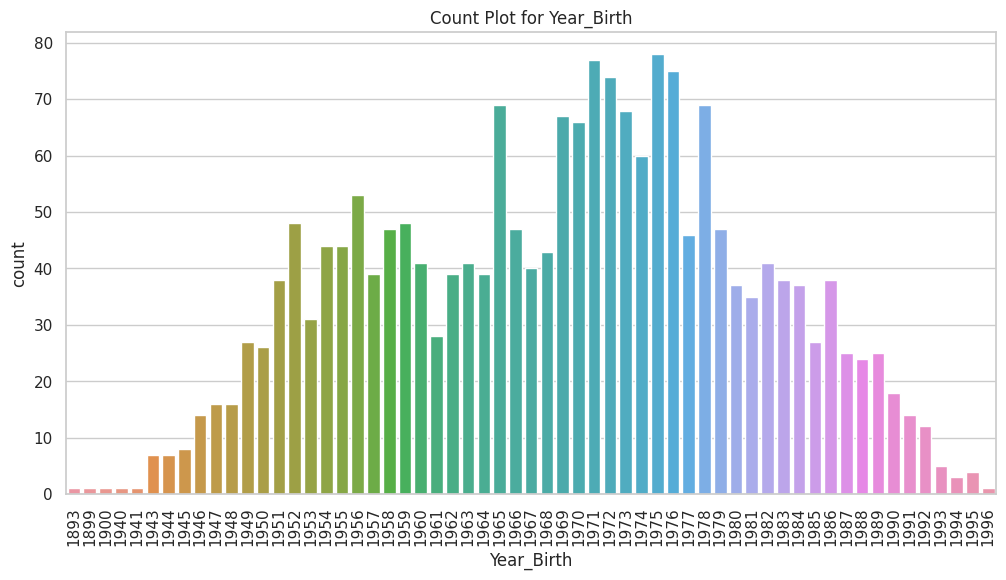

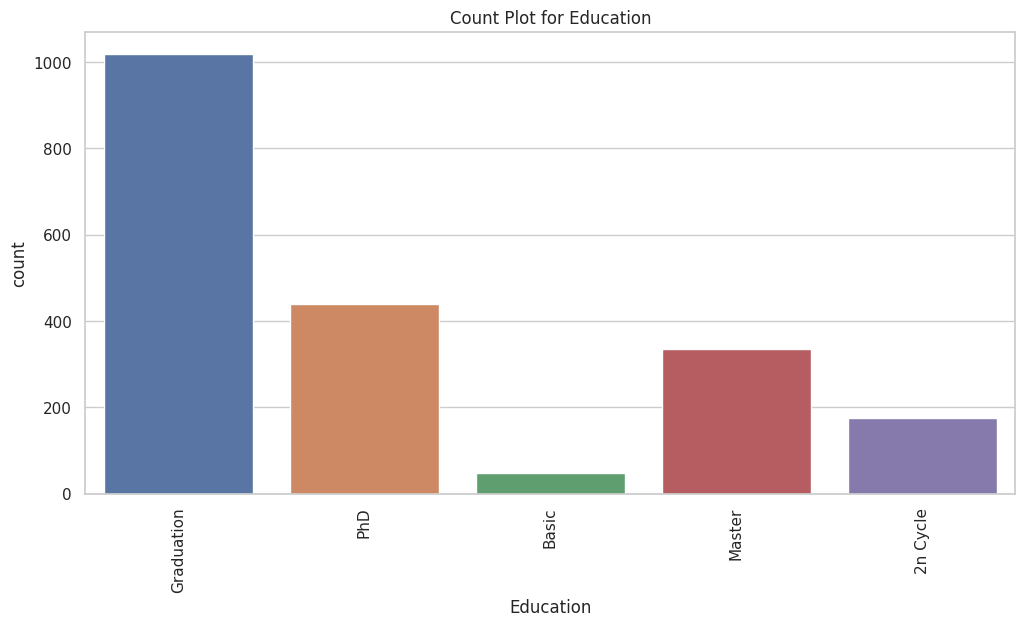

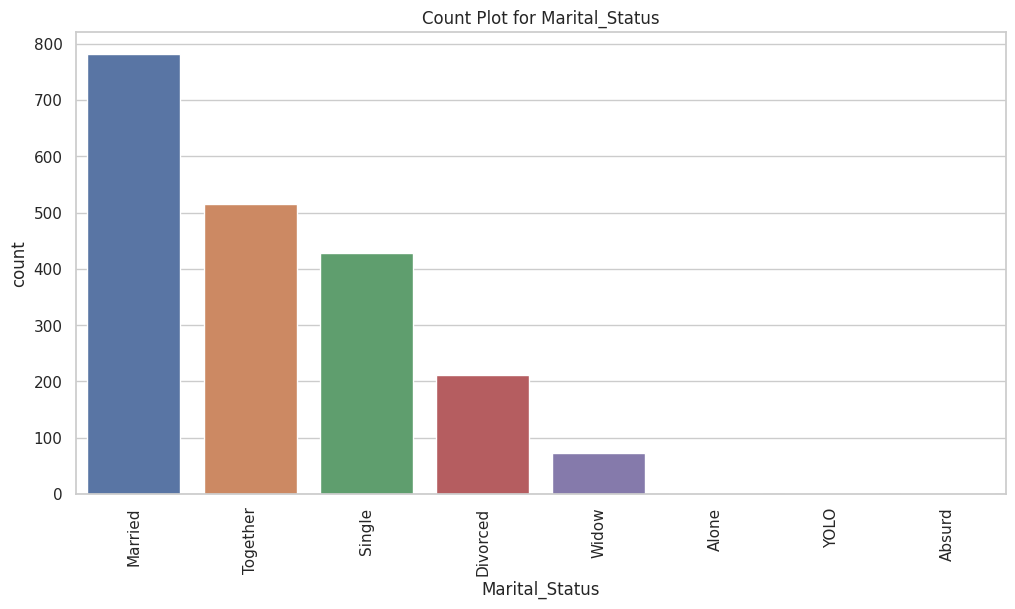

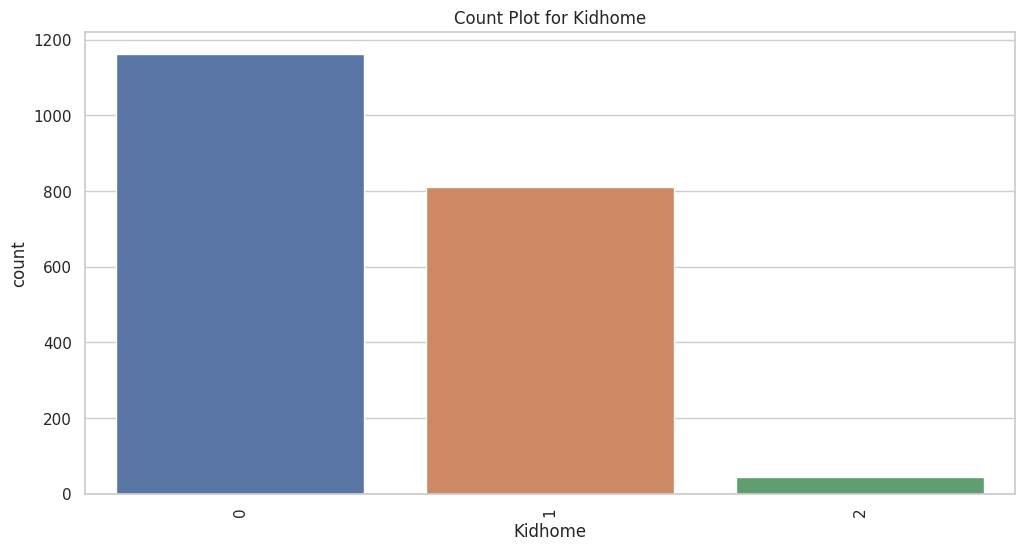

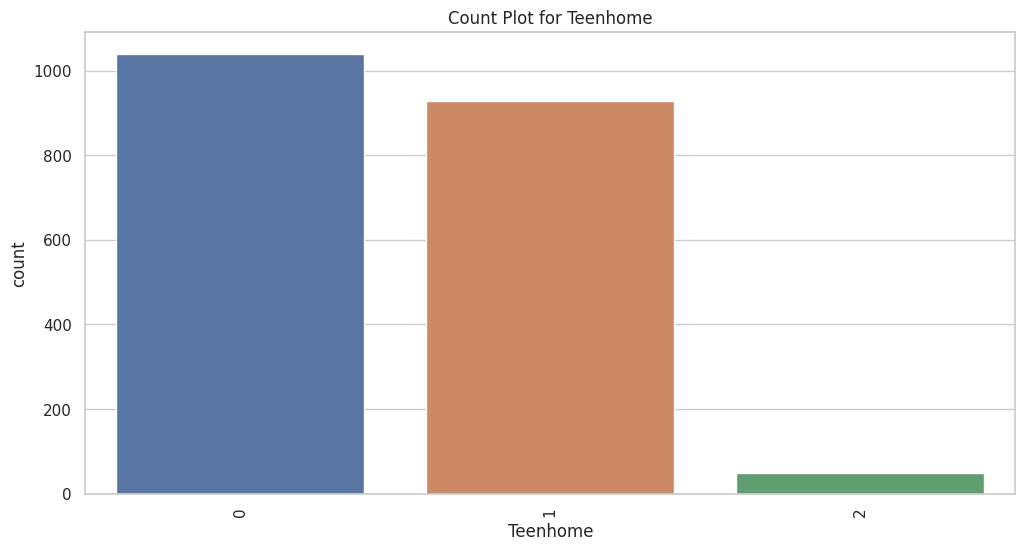

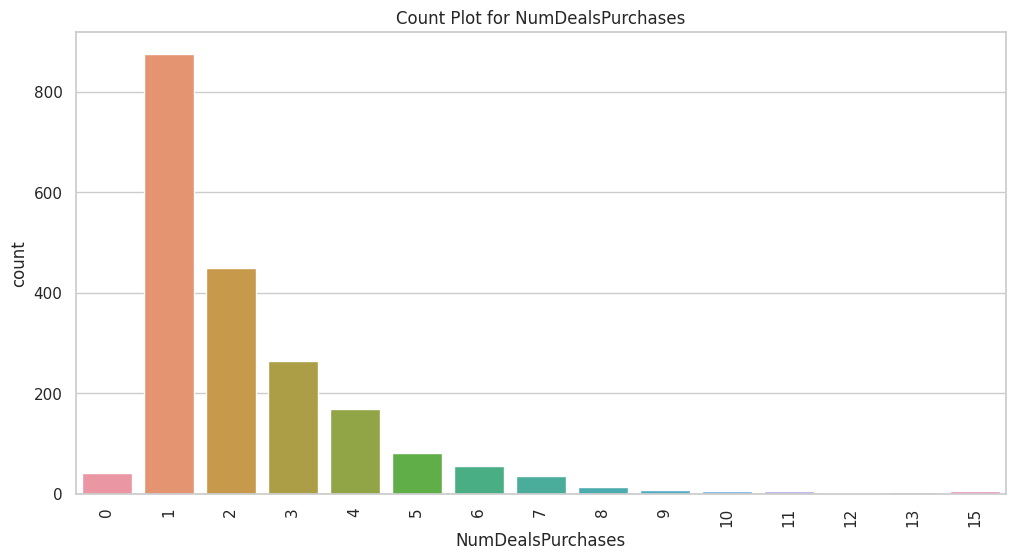

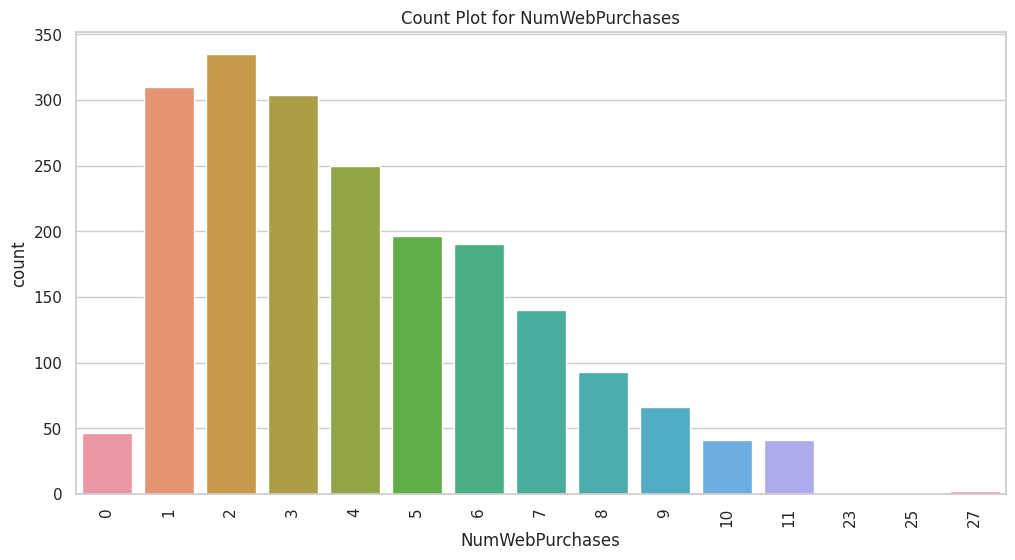

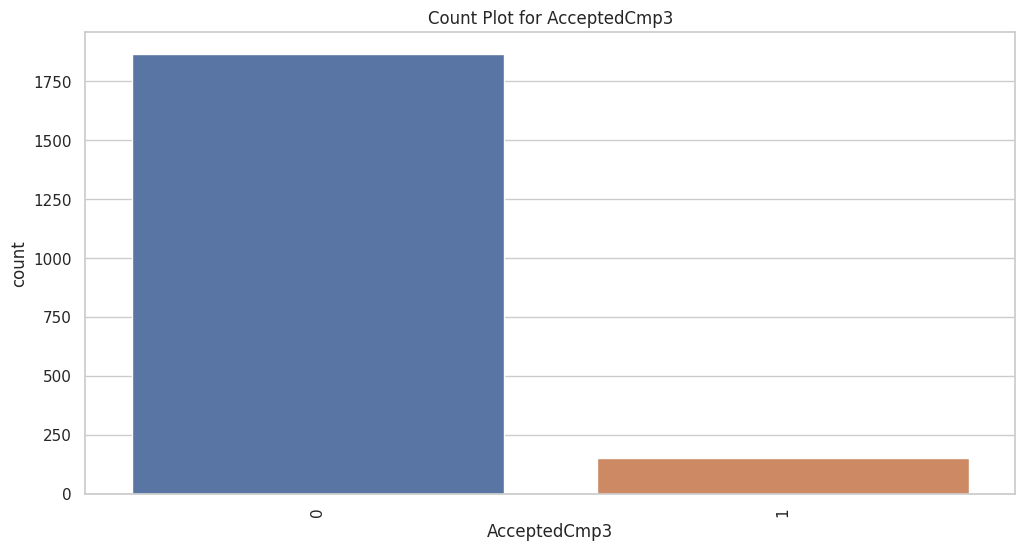

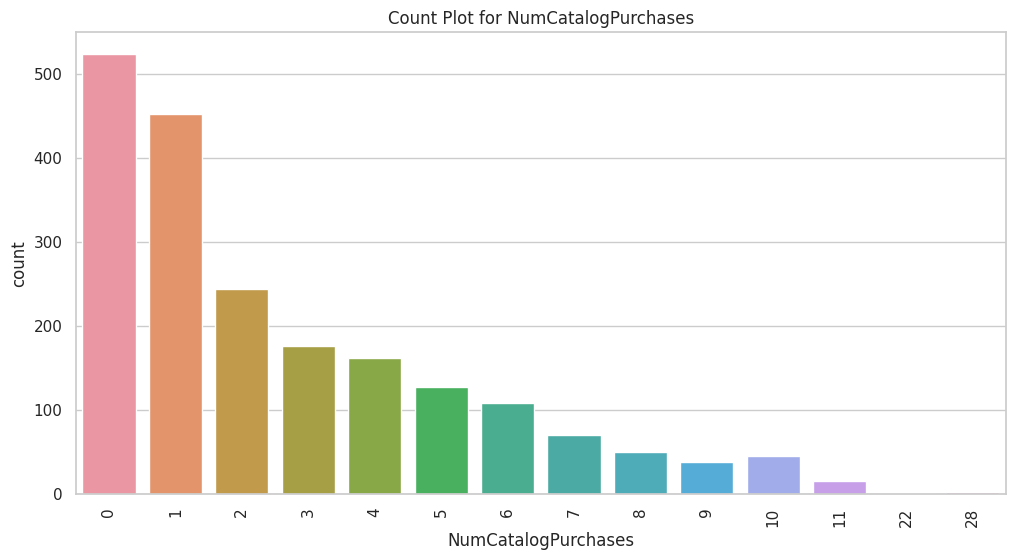

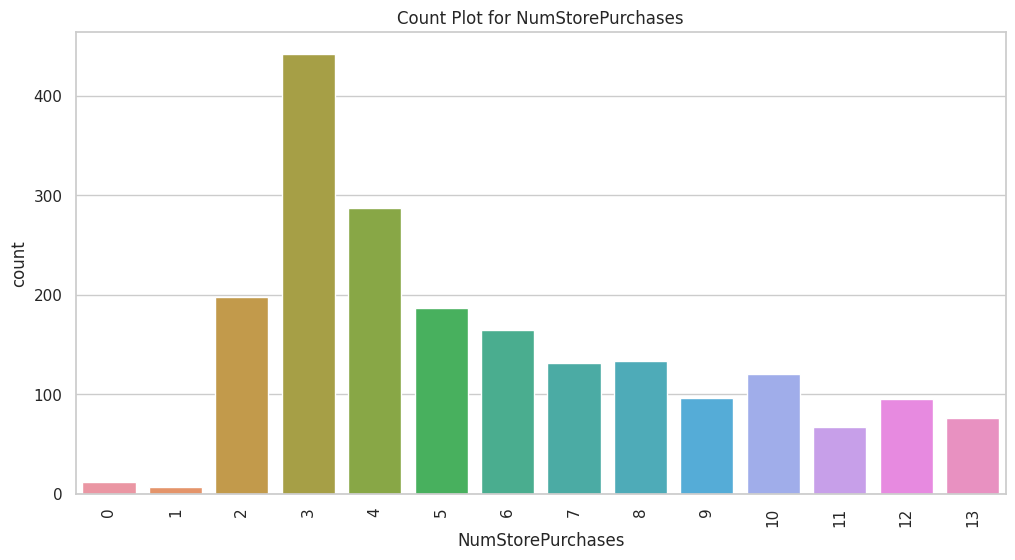

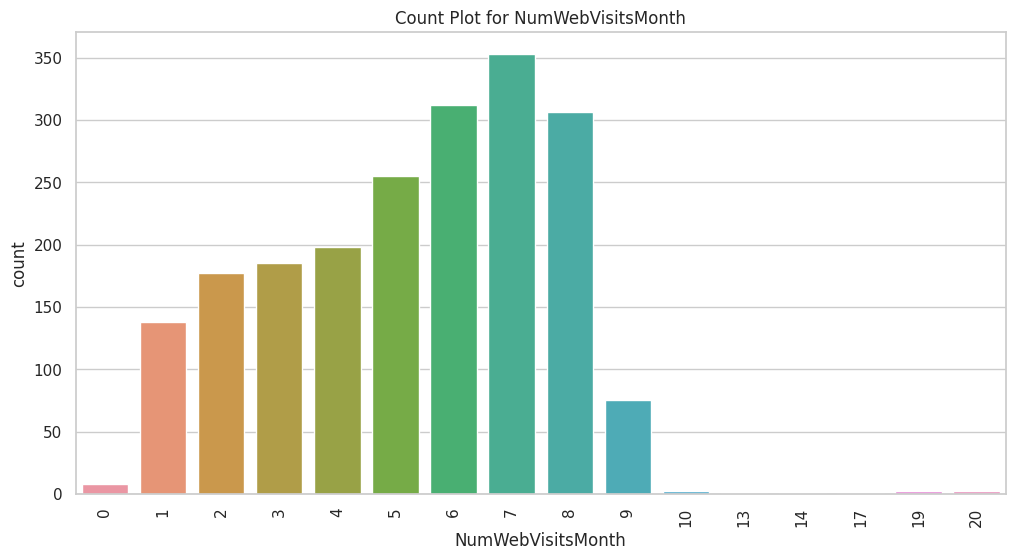

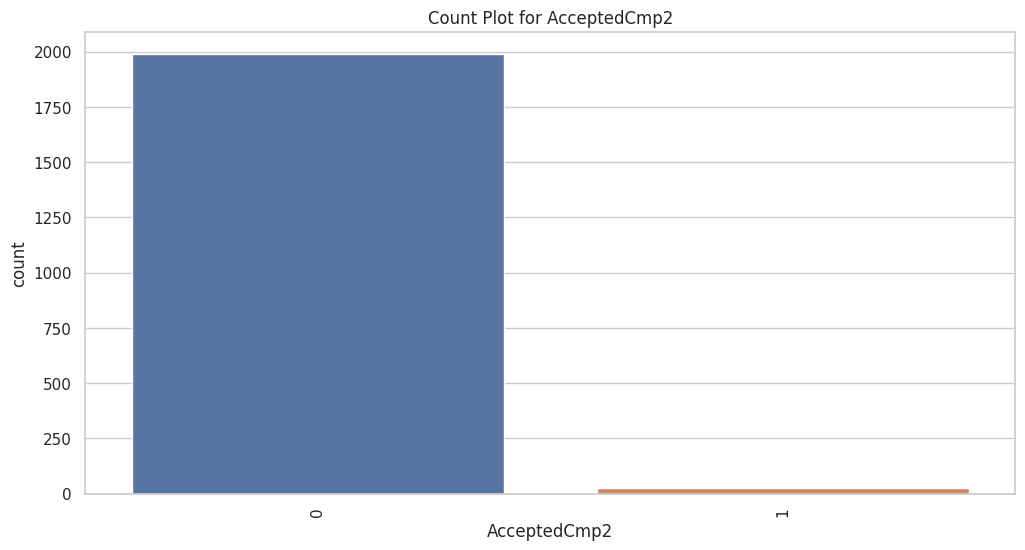

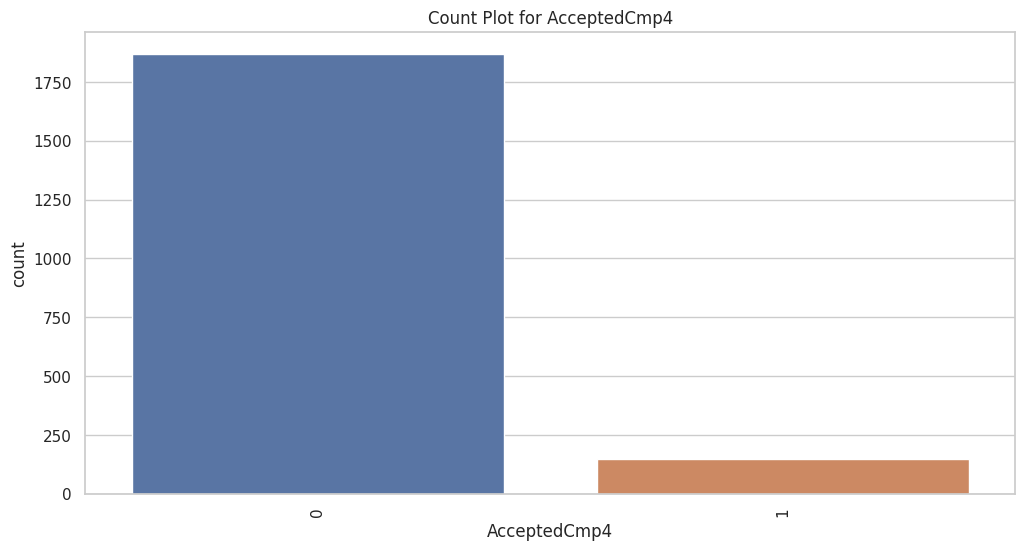

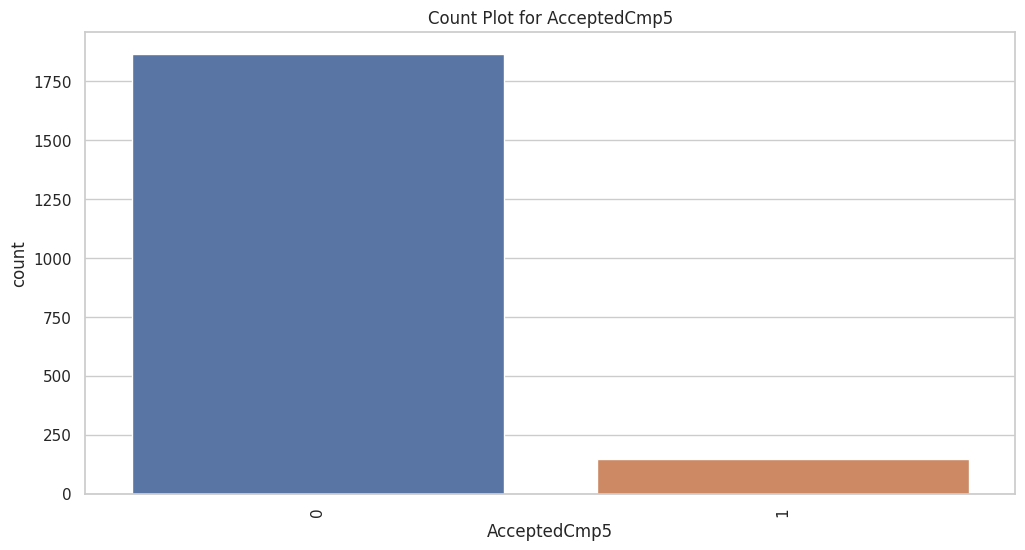

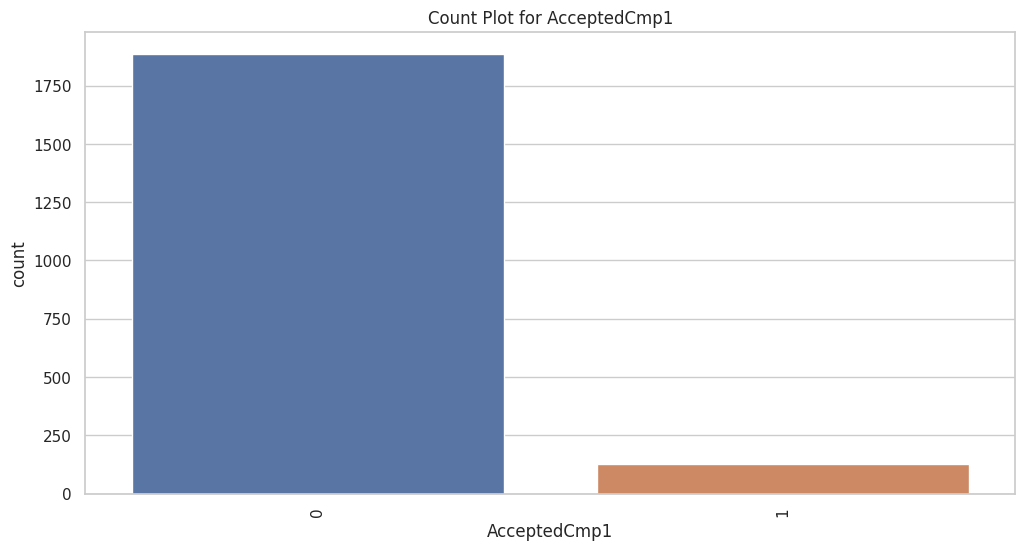

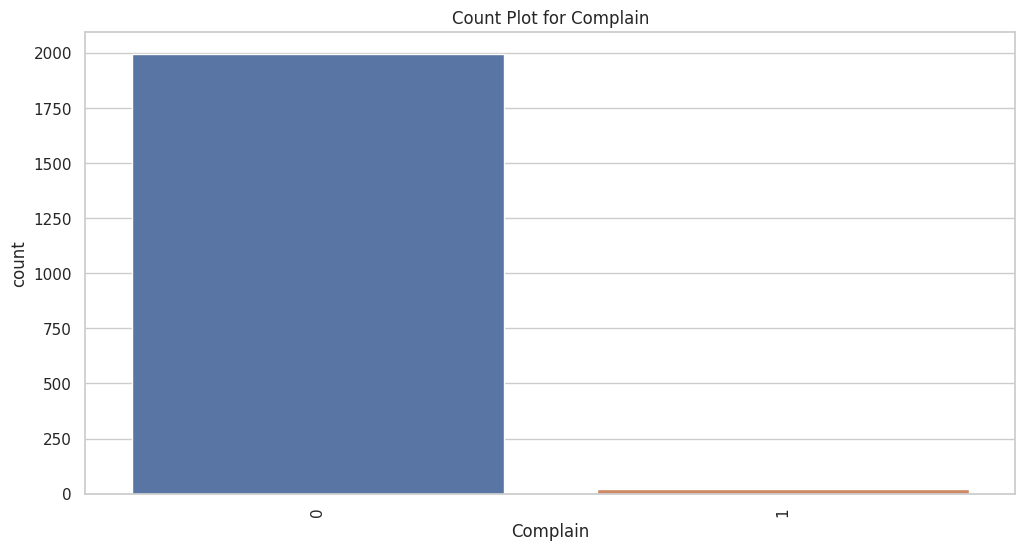

<Figure size 1200x600 with 0 Axes>

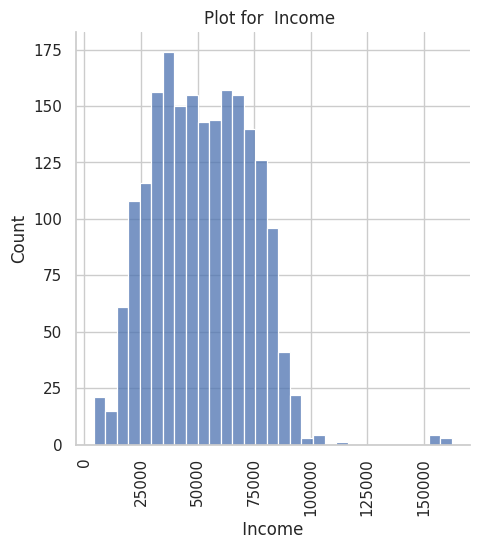

<Figure size 1200x600 with 0 Axes>

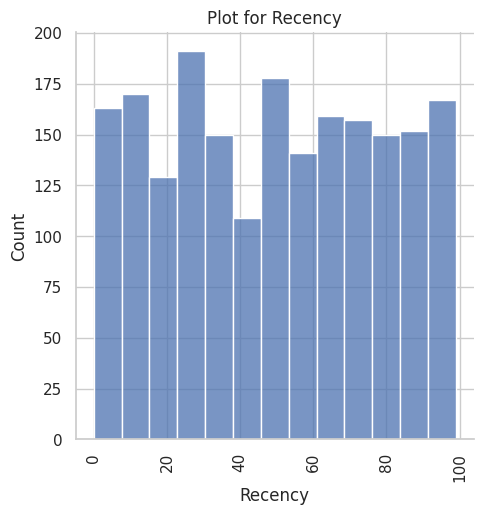

<Figure size 1200x600 with 0 Axes>

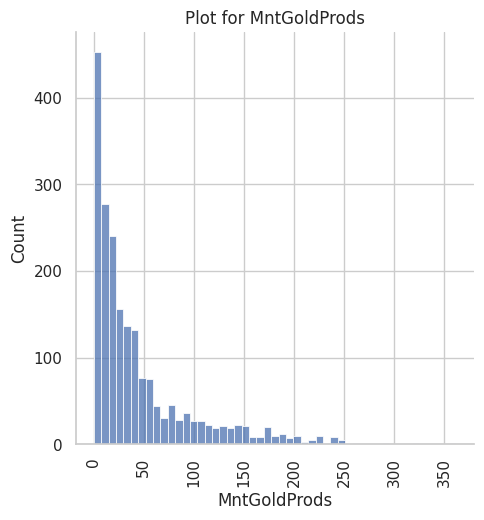

<Figure size 1200x600 with 0 Axes>

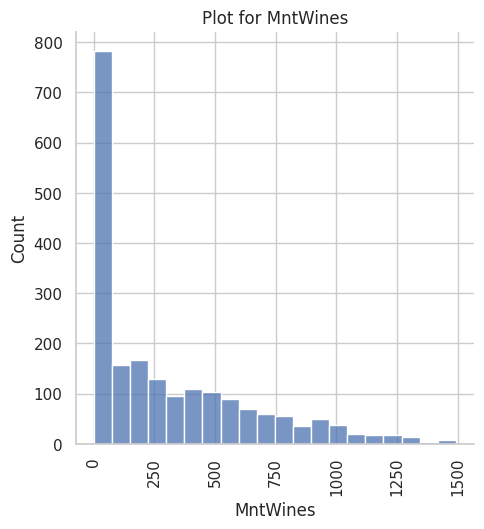

<Figure size 1200x600 with 0 Axes>

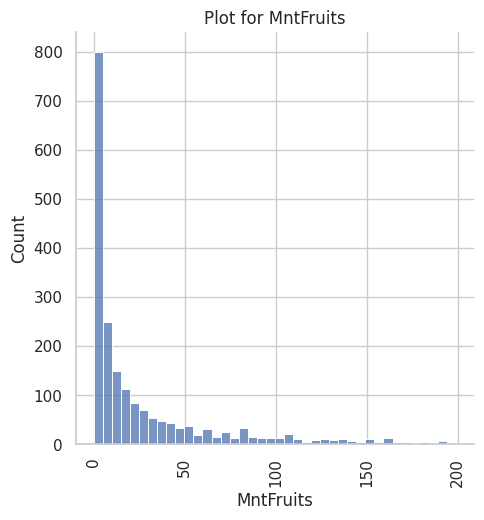

<Figure size 1200x600 with 0 Axes>

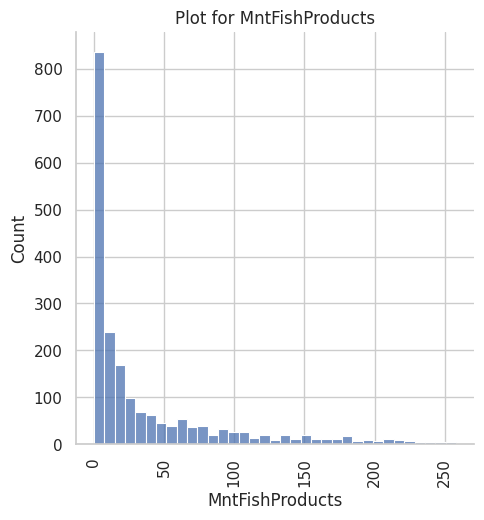

<Figure size 1200x600 with 0 Axes>

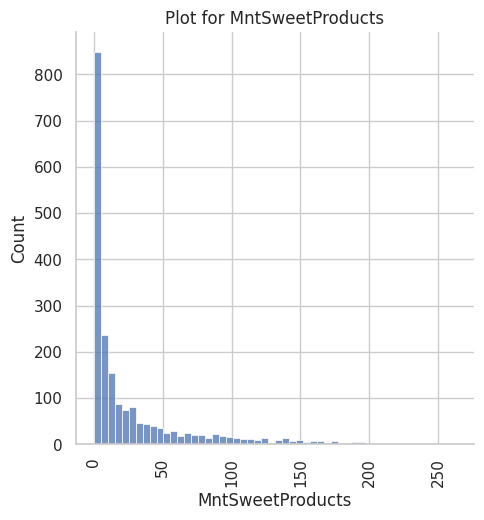

<Figure size 1200x600 with 0 Axes>

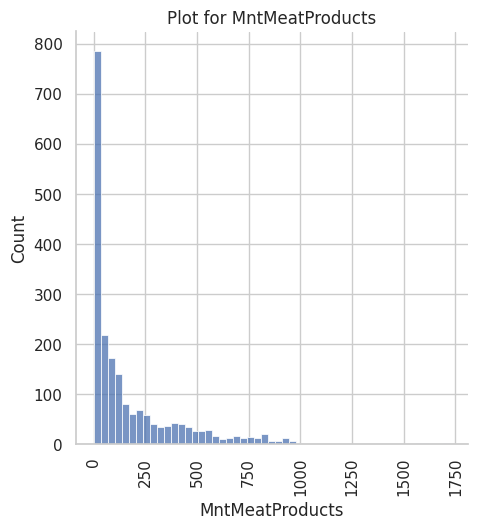

In [9]:
# Using Seaborn Count Plot on single categorical variables
# Using Seaborn Dist Plot on features with huge varience which cannot be plotted using Count Plot

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# List of columns for which count plots will be created
columns_to_plot1 = ['Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
                   'Teenhome', 'NumDealsPurchases', 'NumWebPurchases', 'AcceptedCmp3',
                   'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                   'AcceptedCmp2', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                   'Complain']

# Create count plots for each column
for column in columns_to_plot1:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Count Plot for {column}')
    plt.xticks(rotation=90)
    plt.show()

columns_to_plot2 = [' Income ', 'Recency', 'MntGoldProds', 'MntWines',
                   'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntMeatProducts']

for column in columns_to_plot2:
    plt.figure(figsize=(12, 6))
    sns.displot(x=column, data=df)
    plt.title(f'Plot for {column}')
    plt.xticks(rotation=90)
    plt.show()


# Missing Values in Features

In [10]:
# Since the total number of rows are 2016, by looking at the info, we can determine the number of features with missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2016 non-null   int64  
 1   Education            2016 non-null   object 
 2   Marital_Status       2016 non-null   object 
 3    Income              1995 non-null   float64
 4   Kidhome              2016 non-null   int64  
 5   Teenhome             2016 non-null   int64  
 6   Recency              2016 non-null   int64  
 7   MntGoldProds         2016 non-null   int64  
 8   MntWines             2016 non-null   int64  
 9   MntFruits            2016 non-null   int64  
 10  MntFishProducts      2016 non-null   int64  
 11  MntSweetProducts     2016 non-null   int64  
 12  MntMeatProducts      2016 non-null   int64  
 13  NumDealsPurchases    2016 non-null   int64  
 14  NumWebPurchases      2016 non-null   int64  
 15  AcceptedCmp3         2016 non-null   i

Only the income column has missing values

In [11]:
# Obtaining the count of unique values in the Income column

income_counts = df[' Income '].value_counts()
print(income_counts)


7500.0     10
35860.0     4
39922.0     3
67445.0     3
18690.0     3
           ..
41120.0     1
75794.0     1
30545.0     1
20427.0     1
83528.0     1
Name:  Income , Length: 1798, dtype: int64


I obtained the count to mainly check whether mode imputation might be a good option for my ML framework.

# Data Cleaning/ Feature Engineering


In [12]:
print(df['Marital_Status'].value_counts())

Married     782
Together    516
Single      428
Divorced    212
Widow        72
Alone         2
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64


In [13]:
def marital_cleanup(status):
    if status == 'Alone' or status == 'Absurd' or status == 'YOLO':
        return 'Single'
    else:
        return status

df['Marital_Status'] = df['Marital_Status'].apply(marital_cleanup)





In [14]:
df['Marital_Status'].value_counts()

Married     782
Together    516
Single      434
Divorced    212
Widow        72
Name: Marital_Status, dtype: int64

In [15]:
print(df['Teenhome'].value_counts())

0    1040
1     927
2      49
Name: Teenhome, dtype: int64


In [16]:
def teen_cleanup(status):
    if status == 2:
        return 1
    else:
        return status

df['Teenhome'] = df['Teenhome'].apply(teen_cleanup)

In [17]:
print(df['Teenhome'].value_counts())

0    1040
1     976
Name: Teenhome, dtype: int64


In [18]:
print(df['Kidhome'].value_counts())

0    1163
1     810
2      43
Name: Kidhome, dtype: int64


In [19]:
def kid_cleanup(status):
    if status == 2:
        return 1
    else:
        return status

df['Kidhome'] = df['Kidhome'].apply(kid_cleanup)

In [20]:
print(df['Kidhome'].value_counts())

0    1163
1     853
Name: Kidhome, dtype: int64


# Imputing Missing Values

In [21]:
#I am using various imputing techniques to check which one gives better results

import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer

# Imputation strategies: 'knn', 'mean', 'median', 'mode', 'delete'
imputation_strategy = 'knn'  # Choose the desired strategy

# Select the 'Income' column for imputation
income_column = ' Income '

# Define imputer based on the chosen strategy
if imputation_strategy == 'knn':
    imputer = KNNImputer(n_neighbors=5)
else:
    imputer = SimpleImputer(strategy=imputation_strategy)

# Impute missing values in the 'Income' column
df[income_column] = imputer.fit_transform(df[[income_column]])

# Display the DataFrame after imputation
print(f"\nDataFrame after {imputation_strategy} imputation:")
print(df)


DataFrame after knn imputation:
      Year_Birth   Education Marital_Status   Income   Kidhome  Teenhome  \
0           1989  Graduation        Married   28691.0        1         0   
1           1981         PhD       Together   39665.0        1         0   
2           1975         PhD        Married   69283.0        0         1   
3           1969         PhD        Married   33581.0        1         0   
4           1993  Graduation         Single   72354.0        0         0   
...          ...         ...            ...       ...      ...       ...   
2011        1943      Master         Single   77598.0        0         0   
2012        1954         PhD        Married   62670.0        0         1   
2013        1981         PhD       Together   44953.0        0         0   
2014        1947  Graduation        Married   27469.0        0         0   
2015        1992  Graduation         Single   83528.0        0         0   

      Recency  MntGoldProds  MntWines  MntFruits  ... 

In [22]:
#Checking if all the missing values have been imputed

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2016 non-null   int64  
 1   Education            2016 non-null   object 
 2   Marital_Status       2016 non-null   object 
 3    Income              2016 non-null   float64
 4   Kidhome              2016 non-null   int64  
 5   Teenhome             2016 non-null   int64  
 6   Recency              2016 non-null   int64  
 7   MntGoldProds         2016 non-null   int64  
 8   MntWines             2016 non-null   int64  
 9   MntFruits            2016 non-null   int64  
 10  MntFishProducts      2016 non-null   int64  
 11  MntSweetProducts     2016 non-null   int64  
 12  MntMeatProducts      2016 non-null   int64  
 13  NumDealsPurchases    2016 non-null   int64  
 14  NumWebPurchases      2016 non-null   int64  
 15  AcceptedCmp3         2016 non-null   i

# Encoding Data

In [23]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming 'Education' and 'Marital_Status' are categorical columns
categorical_columns = ['Education', 'Marital_Status']

# Initialize the OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first', sparse=False)

# Encode the categorical columns
onehot_encoded = onehot_encoder.fit_transform(df[categorical_columns])

# Create new column names for the one-hot-encoded features
new_column_names = [f"{col}_{val}" for col, values in zip(categorical_columns, onehot_encoder.categories_) for val in values[1:]]

# Create a DataFrame with the one-hot-encoded features
df_encoded = pd.DataFrame(onehot_encoded, columns=new_column_names)

# Concatenate the encoded features back to the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Drop the original categorical columns
df.drop(categorical_columns, axis=1, inplace=True)

print(df)


      Year_Birth   Income   Kidhome  Teenhome  Recency  MntGoldProds  \
0           1989   28691.0        1         0       56             4   
1           1981   39665.0        1         0       97            31   
2           1975   69283.0        0         1       41             8   
3           1969   33581.0        1         0       38             1   
4           1993   72354.0        0         0       67           182   
...          ...       ...      ...       ...      ...           ...   
2011        1943   77598.0        0         0       53            33   
2012        1954   62670.0        0         1       57            38   
2013        1981   44953.0        0         0       31           124   
2014        1947   27469.0        0         0        2             0   
2015        1992   83528.0        0         0        7           147   

      MntWines  MntFruits  MntFishProducts  MntSweetProducts  ...  \
0            5          4                8                 0  ... 

# Feature Selection using Correlational Matrix

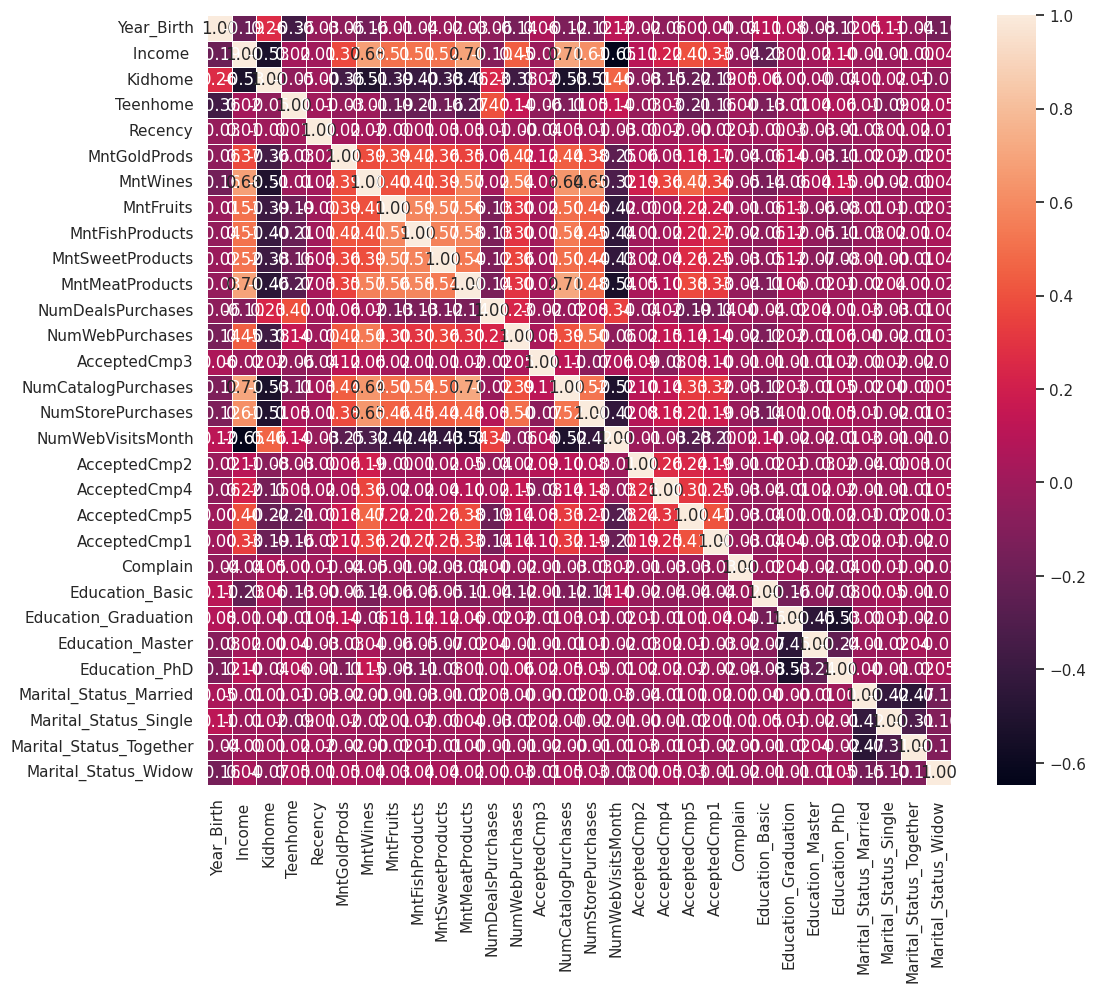

   Year_Birth   Income   Kidhome  Teenhome  Recency  MntGoldProds  MntWines  \
0        1989   28691.0        1         0       56             4         5   
1        1981   39665.0        1         0       97            31       127   
2        1975   69283.0        0         1       41             8       674   
3        1969   33581.0        1         0       38             1        11   
4        1993   72354.0        0         0       67           182       315   

   MntFruits  MntFishProducts  MntSweetProducts  ...  AcceptedCmp1  Complain  \
0          4                8                 0  ...             0         0   
1          1                0                 1  ...             0         0   
2         62                0                26  ...             0         0   
3          0                0                 0  ...             0         0   
4         26              220                12  ...             0         0   

   Education_Basic  Education_Graduation  Ed

In [24]:
#To see the heatmap of the features to check correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5)

plt.show()

# Set the correlation threshold (adjust as needed)
correlation_threshold = 0.7

# Identify features with high correlation
high_corr_features = set()
corr_matrix = df.corr().abs()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > correlation_threshold:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

# Remove features exceeding the correlation threshold
df = df.drop(columns=high_corr_features)

# Display the updated dataset
print(df.head())

# Scaling the Data

In [25]:
# Scaling the whole data using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset = scaler.fit_transform(df)
x = pd.DataFrame(dataset, columns=df.columns)


In [26]:
print(x)

      Year_Birth   Income   Kidhome  Teenhome   Recency  MntGoldProds  \
0       0.932039  0.155758      1.0       0.0  0.565657      0.011050   
1       0.854369  0.225050      1.0       0.0  0.979798      0.085635   
2       0.796117  0.412063      0.0       1.0  0.414141      0.022099   
3       0.737864  0.186634      1.0       0.0  0.383838      0.002762   
4       0.970874  0.431453      0.0       0.0  0.676768      0.502762   
...          ...       ...      ...       ...       ...           ...   
2011    0.485437  0.464565      0.0       0.0  0.535354      0.091160   
2012    0.592233  0.370307      0.0       1.0  0.575758      0.104972   
2013    0.854369  0.258439      0.0       0.0  0.313131      0.342541   
2014    0.524272  0.148042      0.0       0.0  0.020202      0.000000   
2015    0.961165  0.502008      0.0       0.0  0.070707      0.406077   

      MntWines  MntFruits  MntFishProducts  MntSweetProducts  ...  \
0     0.003349   0.020101         0.031008          0.

In [27]:
# Check unique values in y
unique_values_y = set(labels)
print("Unique values in y:", unique_values_y)

# Check data type of y
data_type_y = type(labels)
print("Data type of y:", data_type_y)

# Inspect a few rows of y
print("Sample of y:")
print(labels.head())


Unique values in y: {0, 1}
Data type of y: <class 'pandas.core.series.Series'>
Sample of y:
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


# Model Fitting


In [28]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, labels, test_size=0.2, random_state=11)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

# Assuming you have already split your data into X_train, X_test, Y_train, Y_test

# Define the classifiers and their parameter grids
classifiers = {
    'Gaussian Naive Bayes': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'RandomForestClassifier': RandomForestClassifier(class_weight='balanced'),
    'DecisionTreeClassifier': DecisionTreeClassifier(class_weight='balanced'),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'SVC': SVC(class_weight='balanced')
}

param_grids = {
    'Gaussian Naive Bayes': {'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]},
    'KNeighborsClassifier': {'classifier__n_neighbors': [5, 7, 9, 11, 18, 30], 'classifier__leaf_size': [1, 5, 10, 20, 30],
                             'classifier__p': [1, 2], 'classifier__weights': ['uniform', 'distance'], 'classifier__metric': ['minkowski', 'chebyshev']},
    'Logistic Regression': {'classifier__penalty': ['l1', 'l2'], 'classifier__C': [0.01, 0.1, 1, 10, 100]},
    'RandomForestClassifier': {'classifier__n_estimators': [100, 140, 180, 200],
                               'classifier__max_features': ['auto', 'sqrt'],
                               'classifier__max_depth': [10, 20, 30, None],
                               'classifier__min_samples_split': [2, 5, 10],
                               'classifier__min_samples_leaf': [1, 2, 4, 10],
                               'classifier__bootstrap': [True, False]},
    'DecisionTreeClassifier': {'classifier__max_depth': [3, 7, 10, 15, 20],
                               'classifier__criterion': ['gini', 'entropy'],
                               'classifier__max_features': ['auto', 'sqrt', 'log2'],
                               'classifier__min_samples_split': [2, 4, 6]},
    'GradientBoostingClassifier': {'classifier__max_depth': [3, 5, 7, 9],
                                   'classifier__min_samples_split': [2, 5, 10, 20],
                                   'classifier__min_samples_leaf': [1, 2, 4, 10],
                                   'classifier__n_estimators': [50, 100, 150, 200]},
    'AdaBoostClassifier': {'classifier__n_estimators': [50, 100, 150, 200],
                           'classifier__learning_rate': [0.01, 0.1, 0.5, 1.0]},
    'SVC': {'classifier__C': [0.1, 1, 10, 100],
            'classifier__gamma': [1, 0.1, 0.01, 0.001],
            'classifier__kernel': ['rbf', 'sigmoid', 'linear', 'poly']}
}

# Create the pipeline
def build_pipeline(classifier):
    return Pipeline([
        ('classifier', classifier)
    ])

# Store the results for each classifier
results = {}

# Train and tune the models
for name, classifier in classifiers.items():
    pipeline = build_pipeline(classifier)
    param_grid = param_grids[name]

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro')
    grid_search.fit(X_train, Y_train)

    # Get the best model from the grid search
    best_model = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(Y_test, y_pred)
    f1_macro = f1_score(Y_test, y_pred, average='macro')
    precision = precision_score(Y_test, y_pred, average='macro')
    recall = recall_score(Y_test, y_pred, average='macro')
    best_parameters = grid_search.best_params_  # Add this line

    print(f"Accuracy for {name}: {accuracy:.4f}")
    print(f"Precision for {name}: {precision:.4f}")
    print(f"Recall for {name}: {recall:.4f}")
    print(f"Macro F1 Score for {name}: {f1_macro:.4f}")
    print(f"Best Parameters for {name}: {best_parameters}")  # Add this line
    print("----------------------------------------")

    # Classification report
    report = classification_report(Y_test, y_pred)
    print(f"Classification Report for {name}:\n{report}")

    #Confusion Matrix
    print(confusion_matrix(Y_test, y_pred))

    # Store the results
    results[name] = {
        'best_params': grid_search.best_params_,
        'f1_macro': f1_macro,
        'precision': precision,
        'recall': recall,
        'accuracy': accuracy
    }

# Find the best model based on f1_macro
best_model_name = max(results, key=lambda x: results[x]['f1_macro'])
best_model_result = results[best_model_name]

# Print the best overall model
print("\nBest Overall Model:")
print(f"Model: {best_model_name}")
print(f"Best parameters: {best_model_result['best_params']}")
print(f"Accuracy: {best_model_result['accuracy']:.4f}")
print(f"F1 Macro: {best_model_result['f1_macro']:.4f}")



Accuracy for Gaussian Naive Bayes: 0.8144
Precision for Gaussian Naive Bayes: 0.6690
Recall for Gaussian Naive Bayes: 0.7259
Macro F1 Score for Gaussian Naive Bayes: 0.6882
Best Parameters for Gaussian Naive Bayes: {'classifier__var_smoothing': 1e-09}
----------------------------------------
Classification Report for Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.92      0.85      0.89       344
           1       0.41      0.60      0.49        60

    accuracy                           0.81       404
   macro avg       0.67      0.73      0.69       404
weighted avg       0.85      0.81      0.83       404

[[293  51]
 [ 24  36]]
Accuracy for KNeighborsClassifier: 0.8540
Precision for KNeighborsClassifier: 0.7016
Recall for KNeighborsClassifier: 0.6391
Macro F1 Score for KNeighborsClassifier: 0.6604
Best Parameters for KNeighborsClassifier: {'classifier__leaf_size': 1, 'classifier__metric': 'minkowski', 'classifier__n_neighbors': 5, 

So, the best model according to our results, from all the experiments is GradientBoostingClassifier with
Best parameters: {'classifier__max_depth': 3, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}


Now, we will train the whole dataset 'x' with the model

# Training the whole dataset on the Best Model with the Best Parameters

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GradientBoostingClassifier with the specified parameters
best_classifier = GradientBoostingClassifier(
    max_depth=5,
    min_samples_leaf=10,
    min_samples_split=10,
    n_estimators=100
)

# Fit the model to your training data
best_classifier.fit(x, labels)


GradientBoostingClassifier(max_depth=5, min_samples_leaf=10,
                           min_samples_split=10)

# Feature Importance

In [32]:
import numpy as np

# Extract the feature importances from the first base estimator
first_tree_feature_importances = best_classifier.estimators_[0][0].feature_importances_

# Initialize an array to accumulate feature importances
total_feature_importances = np.zeros_like(first_tree_feature_importances)

# Iterate over all base estimators and accumulate feature importances
for tree_in_stage in best_classifier.estimators_:
    for tree in tree_in_stage:
        total_feature_importances += tree.feature_importances_

# Calculate the mean feature importances across all trees
feature_importances = total_feature_importances / len(best_classifier.estimators_)

# Create a DataFrame to display feature importances
feature_importance_x = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_x = feature_importance_x.sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print(feature_importance_x)

                    Feature  Importance
4                   Recency    0.115627
6                  MntWines    0.094514
10          MntMeatProducts    0.090687
1                   Income     0.079953
5              MntGoldProds    0.074947
8           MntFishProducts    0.059211
14        NumStorePurchases    0.058910
0                Year_Birth    0.056377
11        NumDealsPurchases    0.055804
9          MntSweetProducts    0.045854
7                 MntFruits    0.039691
15        NumWebVisitsMonth    0.035918
18             AcceptedCmp5    0.028248
12          NumWebPurchases    0.025955
19             AcceptedCmp1    0.021594
13             AcceptedCmp3    0.020957
24            Education_PhD    0.016863
25   Marital_Status_Married    0.015705
27  Marital_Status_Together    0.012788
3                  Teenhome    0.012699
16             AcceptedCmp2    0.011392
26    Marital_Status_Single    0.007311
22     Education_Graduation    0.005221
2                   Kidhome    0.004243


# Find the Test Data Labels



Loading the test data

In [33]:
#Loading the test data
test=pd.read_csv("/content/drive/MyDrive/marketing_tst_data.csv")
test

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntGoldProds,MntWines,...,NumWebPurchases,AcceptedCmp3,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain
0,1961,Master,Together,"$74,881.00",1,1,3/8/13,48,54,505,...,9,0,2,12,5,0,0,0,0,0
1,1985,Master,Together,"$40,101.00",1,0,10/14/12,73,62,171,...,6,0,1,6,7,0,0,0,0,0
2,1957,Graduation,Married,"$62,187.00",0,0,7/5/13,49,126,792,...,4,0,8,5,3,0,0,0,0,0
3,1986,Graduation,Together,"$78,394.00",0,0,2/15/13,13,166,298,...,4,0,6,5,2,0,0,0,0,0
4,1950,Graduation,Together,"$28,320.00",0,1,1/14/13,68,4,19,...,1,0,0,3,8,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,1957,PhD,Married,NaN,2,1,11/19/12,4,53,230,...,7,0,2,8,9,0,0,0,0,0
220,1955,PhD,Married,"$59,821.00",0,1,4/12/13,11,35,629,...,11,0,2,7,8,0,0,0,0,0
221,1951,Graduation,Married,"$30,833.00",1,1,7/16/13,33,6,11,...,1,0,0,3,5,0,0,0,0,0
222,1972,Graduation,Together,"$84,906.00",0,0,10/4/13,98,76,997,...,5,0,6,12,2,1,1,1,0,0


# Editing the Test Data

In [34]:
#Removing Dollar Sign before Income
test[' Income '] = test[' Income '].replace('[\$,]', '', regex=True).astype(float)


test

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntGoldProds,MntWines,...,NumWebPurchases,AcceptedCmp3,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain
0,1961,Master,Together,74881.0,1,1,3/8/13,48,54,505,...,9,0,2,12,5,0,0,0,0,0
1,1985,Master,Together,40101.0,1,0,10/14/12,73,62,171,...,6,0,1,6,7,0,0,0,0,0
2,1957,Graduation,Married,62187.0,0,0,7/5/13,49,126,792,...,4,0,8,5,3,0,0,0,0,0
3,1986,Graduation,Together,78394.0,0,0,2/15/13,13,166,298,...,4,0,6,5,2,0,0,0,0,0
4,1950,Graduation,Together,28320.0,0,1,1/14/13,68,4,19,...,1,0,0,3,8,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,1957,PhD,Married,NaN,2,1,11/19/12,4,53,230,...,7,0,2,8,9,0,0,0,0,0
220,1955,PhD,Married,59821.0,0,1,4/12/13,11,35,629,...,11,0,2,7,8,0,0,0,0,0
221,1951,Graduation,Married,30833.0,1,1,7/16/13,33,6,11,...,1,0,0,3,5,0,0,0,0,0
222,1972,Graduation,Together,84906.0,0,0,10/4/13,98,76,997,...,5,0,6,12,2,1,1,1,0,0


In [35]:
# Deleting the feature called Date_Customer as it is not relevant
if 'Dt_Customer' in test.columns:
    test.drop(columns=['Dt_Customer'], inplace=True)

test

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntGoldProds,MntWines,MntFruits,...,NumWebPurchases,AcceptedCmp3,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain
0,1961,Master,Together,74881.0,1,1,48,54,505,72,...,9,0,2,12,5,0,0,0,0,0
1,1985,Master,Together,40101.0,1,0,73,62,171,3,...,6,0,1,6,7,0,0,0,0,0
2,1957,Graduation,Married,62187.0,0,0,49,126,792,0,...,4,0,8,5,3,0,0,0,0,0
3,1986,Graduation,Together,78394.0,0,0,13,166,298,27,...,4,0,6,5,2,0,0,0,0,0
4,1950,Graduation,Together,28320.0,0,1,68,4,19,1,...,1,0,0,3,8,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,1957,PhD,Married,NaN,2,1,4,53,230,42,...,7,0,2,8,9,0,0,0,0,0
220,1955,PhD,Married,59821.0,0,1,11,35,629,0,...,11,0,2,7,8,0,0,0,0,0
221,1951,Graduation,Married,30833.0,1,1,33,6,11,0,...,1,0,0,3,5,0,0,0,0,0
222,1972,Graduation,Together,84906.0,0,0,98,76,997,15,...,5,0,6,12,2,1,1,1,0,0


# Missing Values in Features

In [36]:
# Since the total number of rows are 2016, by looking at the info, we can determine the number of features with missing values
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           224 non-null    int64  
 1   Education            224 non-null    object 
 2   Marital_Status       224 non-null    object 
 3    Income              221 non-null    float64
 4   Kidhome              224 non-null    int64  
 5   Teenhome             224 non-null    int64  
 6   Recency              224 non-null    int64  
 7   MntGoldProds         224 non-null    int64  
 8   MntWines             224 non-null    int64  
 9   MntFruits            224 non-null    int64  
 10  MntFishProducts      224 non-null    int64  
 11  MntSweetProducts     224 non-null    int64  
 12  MntMeatProducts      224 non-null    int64  
 13  NumDealsPurchases    224 non-null    int64  
 14  NumWebPurchases      224 non-null    int64  
 15  AcceptedCmp3         224 non-null    int

Only the income column has missing values

In [37]:
# Obtaining the count of unique values in the Income column

income_counts = test[' Income '].value_counts()
print(income_counts)


58554.0    2
98777.0    2
64014.0    2
7500.0     2
34176.0    2
          ..
85693.0    1
15033.0    1
56320.0    1
44078.0    1
18358.0    1
Name:  Income , Length: 216, dtype: int64


# Data Cleaning/ Feature Engineering of Categorical Data Column

In [38]:
print(test['Marital_Status'].value_counts())

Married     82
Together    64
Single      52
Divorced    20
Widow        5
Alone        1
Name: Marital_Status, dtype: int64


In [39]:
def marital_cleanup(status):
    if status == 'Alone' or status == 'Absurd' or status == 'YOLO':
        return 'Single'
    else:
        return status

test['Marital_Status'] = test['Marital_Status'].apply(marital_cleanup)





In [40]:
test['Marital_Status'].value_counts()

Married     82
Together    64
Single      53
Divorced    20
Widow        5
Name: Marital_Status, dtype: int64

In [41]:
print(test['Teenhome'].value_counts())

0    118
1    103
2      3
Name: Teenhome, dtype: int64


In [42]:
def teen_cleanup(status):
    if status == 2:
        return 1
    else:
        return status

test['Teenhome'] = test['Teenhome'].apply(teen_cleanup)



In [43]:
print(test['Teenhome'].value_counts())

0    118
1    106
Name: Teenhome, dtype: int64


In [44]:
print(test['Kidhome'].value_counts())

0    130
1     89
2      5
Name: Kidhome, dtype: int64


In [45]:
def teen_cleanup(status):
    if status == 2:
        return 1
    else:
        return status

test['Kidhome'] = test['Kidhome'].apply(teen_cleanup)


In [46]:
print(test['Kidhome'].value_counts())

0    130
1     94
Name: Kidhome, dtype: int64


In [47]:
test['Education'].value_counts()

Graduation    108
PhD            46
Master         35
2n Cycle       29
Basic           6
Name: Education, dtype: int64

# Encoding Data

In [48]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming 'Education' and 'Marital_Status' are categorical columns
categorical_columns = ['Education', 'Marital_Status']

# Initialize the OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first', sparse=False)

# Encode the categorical columns
onehot_encoded = onehot_encoder.fit_transform(test[categorical_columns])

# Create new column names for the one-hot-encoded features
new_column_names = [f"{col}_{val}" for col, values in zip(categorical_columns, onehot_encoder.categories_) for val in values[1:]]

# Create a DataFrame with the one-hot-encoded features
test_encoded = pd.DataFrame(onehot_encoded, columns=new_column_names)

# Concatenate the encoded features back to the original DataFrame
test = pd.concat([test, test_encoded], axis=1)

# Drop the original categorical columns
test.drop(categorical_columns, axis=1, inplace=True)

print(test)


     Year_Birth   Income   Kidhome  Teenhome  Recency  MntGoldProds  MntWines  \
0          1961   74881.0        1         1       48            54       505   
1          1985   40101.0        1         0       73            62       171   
2          1957   62187.0        0         0       49           126       792   
3          1986   78394.0        0         0       13           166       298   
4          1950   28320.0        0         1       68             4        19   
..          ...       ...      ...       ...      ...           ...       ...   
219        1957       NaN        1         1        4            53       230   
220        1955   59821.0        0         1       11            35       629   
221        1951   30833.0        1         1       33             6        11   
222        1972   84906.0        0         0       98            76       997   
223        1989   18358.0        1         0       49             4         6   

     MntFruits  MntFishProd

# Imputing Missing Values

In [49]:
#I am using various imputing techniques to check which one gives better results

import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer

# Imputation strategies: 'knn', 'mean', 'median', 'mode', 'delete'
imputation_strategy = 'knn'  # Choose the desired strategy

# Select the 'Income' column for imputation
income_column = ' Income '

# Define imputer based on the chosen strategy
if imputation_strategy == 'knn':
    imputer = KNNImputer(n_neighbors=5)
else:
    imputer = SimpleImputer(strategy=imputation_strategy)

# Impute missing values in the 'Income' column
test[income_column] = imputer.fit_transform(test[[income_column]])

# Display the DataFrame after imputation
print(f"\nDataFrame after {imputation_strategy} imputation:")
print(test)


DataFrame after knn imputation:
     Year_Birth       Income   Kidhome  Teenhome  Recency  MntGoldProds  \
0          1961  74881.000000        1         1       48            54   
1          1985  40101.000000        1         0       73            62   
2          1957  62187.000000        0         0       49           126   
3          1986  78394.000000        0         0       13           166   
4          1950  28320.000000        0         1       68             4   
..          ...           ...      ...       ...      ...           ...   
219        1957  53931.877828        1         1        4            53   
220        1955  59821.000000        0         1       11            35   
221        1951  30833.000000        1         1       33             6   
222        1972  84906.000000        0         0       98            76   
223        1989  18358.000000        1         0       49             4   

     MntWines  MntFruits  MntFishProducts  MntSweetProducts  ...  

In [50]:
#Checking if all the missing values have been imputed

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               224 non-null    int64  
 1    Income                  224 non-null    float64
 2   Kidhome                  224 non-null    int64  
 3   Teenhome                 224 non-null    int64  
 4   Recency                  224 non-null    int64  
 5   MntGoldProds             224 non-null    int64  
 6   MntWines                 224 non-null    int64  
 7   MntFruits                224 non-null    int64  
 8   MntFishProducts          224 non-null    int64  
 9   MntSweetProducts         224 non-null    int64  
 10  MntMeatProducts          224 non-null    int64  
 11  NumDealsPurchases        224 non-null    int64  
 12  NumWebPurchases          224 non-null    int64  
 13  AcceptedCmp3             224 non-null    int64  
 14  NumCatalogPurchases      2

# Feature Selection using Correlational Matrix

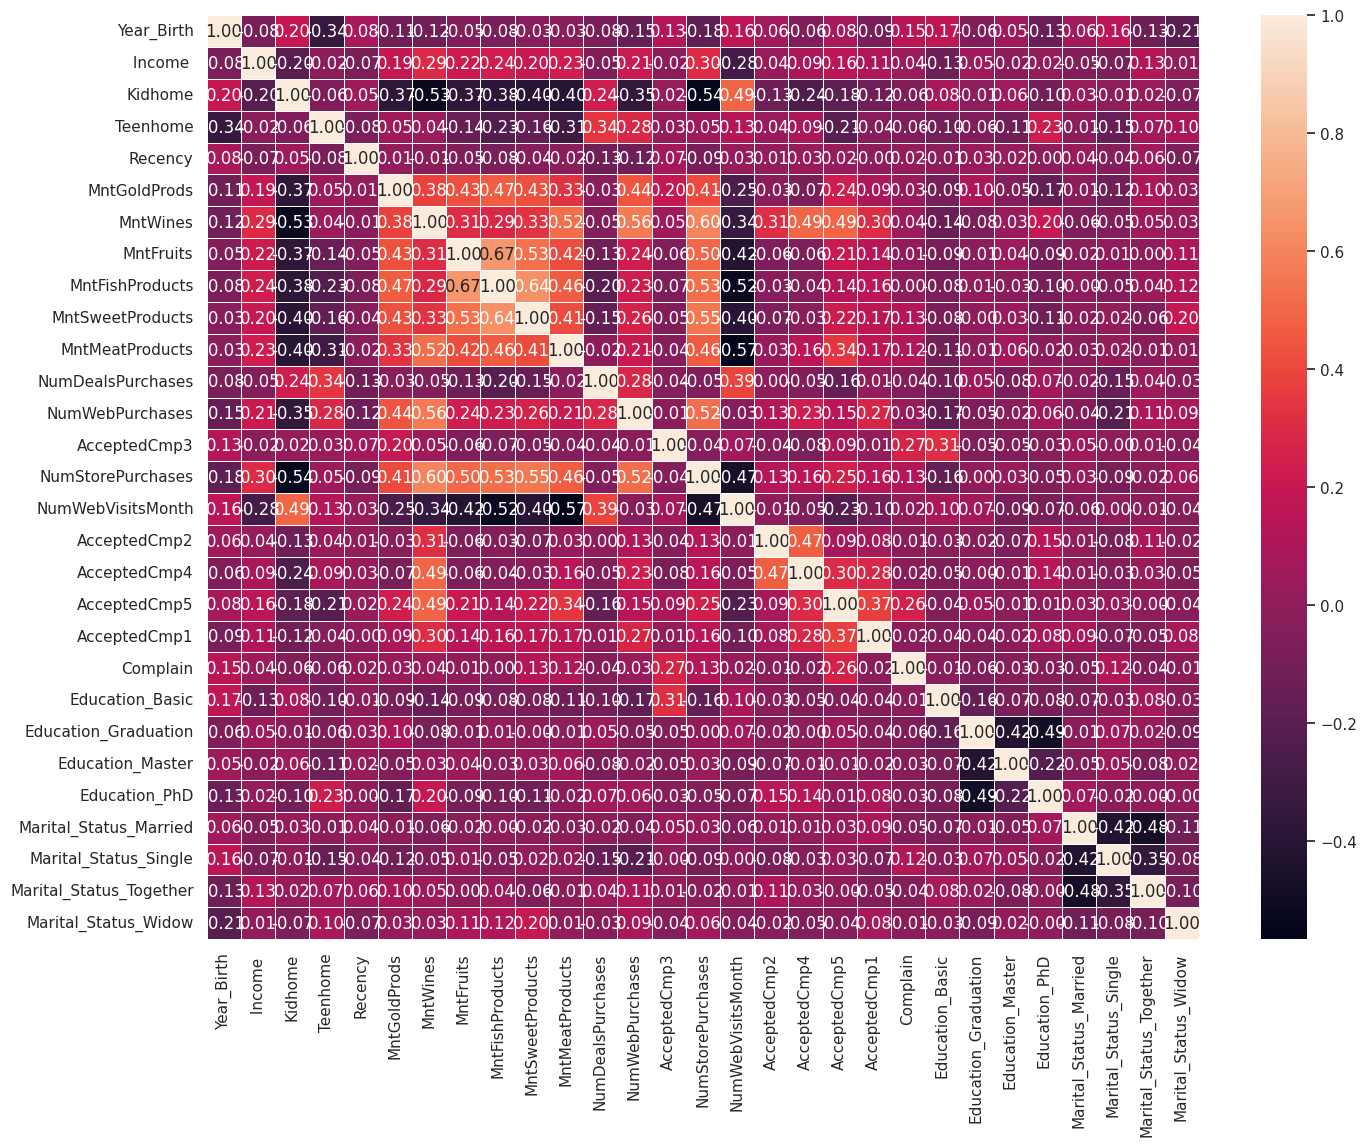

   Year_Birth   Income   Kidhome  Teenhome  Recency  MntGoldProds  MntWines  \
0        1961   74881.0        1         1       48            54       505   
1        1985   40101.0        1         0       73            62       171   
2        1957   62187.0        0         0       49           126       792   
3        1986   78394.0        0         0       13           166       298   
4        1950   28320.0        0         1       68             4        19   

   MntFruits  MntFishProducts  MntSweetProducts  ...  AcceptedCmp1  Complain  \
0         72               36                27  ...             0         0   
1          3               26                24  ...             0         0   
2          0               45                45  ...             0         0   
3         27              216                24  ...             0         0   
4          1                3                 2  ...             0         0   

   Education_Basic  Education_Graduation  Ed

In [52]:
#To see the heatmap of the features to check correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

sns.heatmap(test.corr(), annot=True, fmt=".2f", linewidths=0.5)

plt.show()

# Set the correlation threshold (adjust as needed)
correlation_threshold = 0.7

# Identify features with high correlation
high_corr_features = set()
corr_matrix = test.corr().abs()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > correlation_threshold:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

# Remove features exceeding the correlation threshold
test = test.drop(columns=high_corr_features)

# Display the updated dataset
print(test.head())

# Scaling the Data

In [54]:
# Scaling the whole data using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset = scaler.fit_transform(test)
test = pd.DataFrame(dataset, columns=test.columns)


In [55]:
print(test)

     Year_Birth   Income   Kidhome  Teenhome   Recency  MntGoldProds  \
0          0.30  0.110012      1.0       1.0  0.484848      0.232759   
1          0.78  0.057706      1.0       0.0  0.737374      0.267241   
2          0.22  0.090922      0.0       0.0  0.494949      0.543103   
3          0.80  0.115295      0.0       0.0  0.131313      0.715517   
4          0.08  0.039989      0.0       1.0  0.686869      0.017241   
..          ...       ...      ...       ...       ...           ...   
219        0.22  0.078507      1.0       1.0  0.040404      0.228448   
220        0.18  0.087363      0.0       1.0  0.111111      0.150862   
221        0.10  0.043768      1.0       1.0  0.333333      0.025862   
222        0.52  0.125089      0.0       0.0  0.989899      0.327586   
223        0.86  0.025007      1.0       0.0  0.494949      0.017241   

     MntWines  MntFruits  MntFishProducts  MntSweetProducts  ...  \
0    0.339838   0.393443         0.138996          0.140625  ...   

In [56]:
# Assuming best_classifier is already trained on X_train and y_train

# Predict labels for the test data
y_pred = best_classifier.predict(test)

# Now you have the predicted labels in y_pred
print("Predicted Labels:", y_pred)


Predicted Labels: [0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0
 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 1 0]


In [57]:
# Create a DataFrame with the modified index and predicted labels
predictions_test = pd.DataFrame({'Index': 'd' + (test.index + 1).astype(str), 'Predicted_Labels': y_pred})

# Save the DataFrame to a CSV file with the modified index
predictions_test.to_csv('predicted_labels.csv', index=False)

# Print a message indicating that the file has been saved
print("Predicted labels with modified index saved to 'predicted_labels.csv'")

predictions_test

Predicted labels with modified index saved to 'predicted_labels.csv'


,Index,Predicted_Labels
0,d1,0
1,d2,0
2,d3,0
3,d4,0
4,d5,0
...,...,...
219,d220,1
220,d221,0
221,d222,0
222,d223,1


In [58]:
import os
import pandas as pd
from google.colab import files

# Check the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

# View the file in the file browser
files.view('predicted_labels.csv')

# Download the file to your local machine
files.download('predicted_labels.csv')


Current Working Directory: /content


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>